# Ciencia de datos aplicada (ITBA): Modelo de segundo entregable

**Equipo:** Desiree Melisa Limachi, Felipe Mendiondo, German Lorenzani

**Nombre del proyecto**:
Sistema de pricing dinámico para ATUA

### 🧾 1. Importación y carga de librerías

('Reservas.csv', <http.client.HTTPMessage at 0x2dd3dffc1c0>)

In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker
import math
import re


### 🧾 2. Carga de datos

Con este código cargamos el archivo de reservas de Atua y limpiamos para enfocarnos solo en la información relevante para el análisis. Se eliminan varias columnas que no aportaban valor, como datos personales de los clientes, identificadores únicos y observaciones internas, porque por un lado no eran relevantes para nuestro analisis y por otro al ser algunos datos sensibles como la informacion de los clientes no parecio mejor, por seguridad, trabajar sin ellos.


In [ ]:
df = pd.read_csv('dataset/Reservas.csv', sep=';')

# Eliminamos columnas no necesarias
df_filtered = df.drop(columns=['Email', 'Dni', 'Telefono', 'uuid', 'Cliente', 'Proveedor de carro',
                               'Patente', 'Anifitrion', 'Celular', 'Iva', 'Observaciones', 'Pago Anfitrion',
                               'Condicion', 'id', 'Entrega Aeropuerto', 'Devolucion Aeropuerto', 'Devolución Garantia'])

df_filtered.to_csv('dataset/Reservas_limpio.csv', sep=';', index=False)

df_filtered.head()

,Fecha de creacion,Estado,Ubicacion,Origen,Modelo,Nuevo Precio,Precio de la publicacion,Precio de la reserva,Gastos administrativo,Seguro base,Seguro Contra Terceros,Seguro Premium,Precio final,Pago seña,Pendiente Por Cobrar,Check-in,Check-out,Dias de Alquiler,Pago de garantia,Monto de la garantia
0,2022-09-14 15:56:05.325406,CANCELADA,"Costa Rica 3966, ADB, Buenos Aires, Argentina",NaN,Sandero,ARS 49.000,ARS 7.633,ARS 22.900,ARS 1.145,ARS 5.200,ARS 0,ARS 0,ARS 29.485,ARS 0,ARS 0,16/9/22 0:00,19/9/22 0:00,3,NO,ARS 0
1,2022-09-15 09:02:19.699192,CANCELADA,"Costa Rica 3966, ADB, Buenos Aires, Argentina",NaN,Sandero,ARS 49.000,ARS 7.533,ARS 22.600,ARS 1.130,ARS 5.200,ARS 0,ARS 0,ARS 29.167,ARS 0,ARS 0,17/9/22 0:00,20/9/22 0:00,3,NO,ARS 0
2,2022-09-15 16:34:28.967242,CANCELADA,"Costa Rica 3966, ADB, Buenos Aires, Argentina",NaN,Polo,ARS 25.000,ARS 50,ARS 150,ARS 8,ARS 3.900,ARS 0,ARS 0,ARS 4.059,ARS 0,ARS 0,17/9/22 0:00,20/9/22 0:00,3,NO,ARS 0
3,2022-09-16 09:47:21.170276,COMPLETADA,"Costa Rica 3966, ADB, Buenos Aires, Argentina",NaN,Polo,ARS 25.000,ARS 50,ARS 50,ARS 2,ARS 1.300,ARS 0,ARS 0,ARS 1.353,ARS 0,ARS 0,18/9/22 0:00,19/9/22 0:00,1,SI,ARS 0
4,2022-09-16 12:47:25.829897,CANCELADA,"Costa Rica 3966, ADB, Buenos Aires, Argentina",NaN,Sandero,ARS 49.000,ARS 5.500,ARS 5.500,ARS 275,ARS 1.300,ARS 0,ARS 0,ARS 7.133,ARS 0,ARS 0,19/9/22 0:00,20/9/22 0:00,1,NO,ARS 0


El presente análisis se basa en un dataset provisto por ATUA, una empresa argentina dedicada al alquiler de vehículos. El conjunto contiene 5.234  reservas de autos realizadas durante el año 2024 y 2025. Cada fila representa una reserva individual con información relacionada a su creación, duración, canal de origen, costos, estado final y ubicación geográfica.

Las reservas se encuentran en diferentes estados como cancelada, completada, check-in y check-out. También se incluye información sobre pagos realizados, montos pendientes, señas y garantías, lo que permite estudiar el comportamiento de los clientes y el funcionamiento operativo de la empresa.

El dataset cuenta con 20 variables:

Fecha de creación: fecha y hora en que se registró la reserva

Estado: estado final de la reserva

Ubicación: dirección específica de gestión de la reserva

Provincia: provincia donde se realizó la operación

Origen: canal digital de la reserva (web, app)

Modelo: modelo del vehículo alquilado

Nuevo precio: valor actualizado del vehículo

Precio de la publicación: valor publicado en el canal digital

Precio de la reserva: precio acordado para la reserva

Gastos administrativos: costos asociados a la gestión

Seguro base: costo base del seguro del vehículo

Precio final: total que el cliente debía pagar

Pago seña: adelanto entregado por el cliente

Pendiente por cobrar: saldo pendiente de pago

Check-in: inicio del período de alquiler

Check-out: finalización del alquiler

Días de alquiler: duración total del servicio

Pago de garantía: indica si se abonó garantía

Monto de la garantía: valor entregado como garantía

Devolución garantía: indica si se devolvió el importe


Para el análisis se utilizarán principalmente las variables modelo, provincia y precio de la publicacion para estudiar el comportamiento de los precios según la demanda y la ubicación geográfica. Además, se considerarán variables como estado, seguro base y gastos administrativos para evaluar el impacto económico de las cancelaciones y explorar aspectos vinculados a la satisfacción del cliente y la eficiencia operativa. Estas variables permitirán abordar tanto la dinámica comercial como la experiencia del usuario dentro del proceso de reservas.




### 🧪 4. Transformaciones realizadas
En esta parte del trabajo, lo que hicimos fue normalizar y limpiar columnas clave del dataset que notamos que tenian inconsistencias para dejarlo mas ordenado y facilitar el resto del analisis.
Primero eliminamos columnas innecesarias que no aportaban valor o tenían información redundante o sensible, como datos personales y campos administrativos.
Luego trabajamos con la columna de fechas, convirtiéndola al formato datetime y filtrando únicamente las reservas creadas a partir del 1 de diciembre de 2024 ya que inicialmente la empresa tenia un modelo de alquileres de autos tradicionales en aeropuertos, a diferencia de ahora que no tiene autos propios y funciona como un intermediario entre las  personas que quieren alquilar su auto y personas que necesitan alquilar un auto, y muchos datos estaban desactualizados y no podian ser usados para nuestro analisis.
También aprovechamos la existencia de la columna “Nuevo Precio” para quedarnos únicamente con las reservas donde el precio publicado ya estaba actualizado, y eliminamos esa columna para evitar duplicidad.
Luego trabajamos en normalizar la ubicacion. Tomamos la provincia desde la columna “Ubicación”, que venía con información mezclada, y unificamos los nombres de provincias que aparecían con distintas variantes, por ejemplo, “CABA”, “Capital Federal”, “Ciudad Autónoma de Buenos Aires” y barrios como "Caballito" fueron reemplazadas por “Buenos Aires”.
Paso siguiente, normalizamos las columnas de tipo monetario como precio, precio final pago seña, etc, que originalmente contenían símbolos y separadores como puntos y comas. Eliminamos estos caracteres y convertimos todos los valores a tipo numérico para poder analizarlos sin errores.
Además, filtramos las reservas cuyo origen fuera “RentlyApp” ya que fueron de un periodo de prueba que realizo la empresa que quedo registrado pero no aportan valor al analisis.
Finalmente, normalizamos la columna "Modelo"  separando automáticamente a qué marca pertenece cada vehículo en base a su nombre o a palabras clave dentro del modelo. Esto nos permitió crear una nueva columna “Marca”.
Todos los datos limpios y normalizados fueron exportados al archivo Reservas_limpio.csv, que usamos como versión final para los análisis posteriores.



In [ ]:
# Normalización de fechas
df_filtered['Fecha de creacion'] = pd.to_datetime(df_filtered['Fecha de creacion'], errors='coerce')
fecha_limite = pd.to_datetime('2024-12-01')
df_filtered = df_filtered[df_filtered['Fecha de creacion'] >= fecha_limite]

#Podemos notar que al tener nuevo precio, podemos utilizar solo los datos donde ya esta actualizado
df_filtered = df_filtered[df_filtered['Nuevo Precio'] == df_filtered['Precio de la publicacion']]
df_filtered = df_filtered.drop(columns=['Nuevo Precio'])


#Normalización de Ubicación
ciudades_a_provincias = {
    'San Miguel de Tucumán': 'Tucumán',
    'Rosario': 'Santa Fe',
    'Capital Federal': 'Buenos Aires',
    'CABA': 'Buenos Aires',
    'Campana' : 'Buenos Aires',
    'Córdoba Capital' : 'Córdoba',
    'Godoy Cruz': 'Mendoza',
    'Villa Urquiza CABA': 'Buenos Aires',
    'Rio Negro' : 'Río Negro',
    'San Rafael': 'Mendoza',
    'Capital' : 'Buenos Aires',
    'Monteros': 'Tucumán',
    'Comodoro Rivadavia' : 'Chubut',
    'caballito': 'Buenos Aires',
    'aeropuerto': 'Río negro'
}
provincias_validas = {
    'Buenos Aires', 'CABA', 'Catamarca', 'Chaco', 'Chubut', 'Córdoba', 'Corrientes',
    'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones',
    'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
    'Santa Fe', 'Santiago del Estero', 'Tierra del Fuego', 'Tucumán'
}

def extraer_provincia(ubicacion):
    if pd.isna(ubicacion):
        return np.nan

    partes = [p.strip() for p in ubicacion.split(',')]

    if len(partes) >= 2:
        posible_prov = partes[-2]
    else:
        posible_prov = partes[0]

    posible_prov = re.sub(r'\bprovince\b', '', posible_prov, flags=re.IGNORECASE).strip().lower()
    posible_prov_title = posible_prov.title()

    if posible_prov_title in ciudades_a_provincias:
        return ciudades_a_provincias[posible_prov_title]
    if posible_prov_title in provincias_validas:
        return posible_prov_title

    for prov in provincias_validas:
        if prov.lower() in ubicacion.lower():
            return prov

    return np.nan

df_filtered['Provincia'] = df_filtered['Ubicacion'].apply(extraer_provincia)

#Normalización de Precios
columnas_monetarias = [
    'Precio de la publicacion', 'Precio de la reserva',
    'Gastos administrativo', 'Seguro base', 'Seguro Contra Terceros',
    'Seguro Premium', 'Precio final', 'Pago seña',
    'Pendiente Por Cobrar', 'Monto de la garantia'
]

# Reemplazar valores monetarios '0' por NaN y procesar las columnas
for col in columnas_monetarias:
    df_filtered[col] = (
        df_filtered[col]
        .astype(str)
        .str.replace('ARS', '', regex=False)
        .str.replace('.', '', regex=False)
        .str.replace(',', '', regex=False)
        .str.strip()
        .replace('',  0)
        .astype(float)
        .astype(int)
    )

## Normalización de origen
df_filtered = df_filtered[df_filtered['Origen'].str.lower() != 'rentlyapp']


## Normalización de modelos
marcas = [
    'Peugeot', 'Volkswagen', 'Chevrolet', 'Fiat', 'Renault', 'Ford', 'Toyota', 'Nissan',
    'Honda', 'Citroen', 'Hyundai', 'Kia', 'Mercedes', 'BMW', 'Audi', 'Jeep', 'Chery'
]

def normalizar_marca(modelo):
    if pd.isna(modelo):
        return 'Otro'

    modelo_lower = modelo.lower()

    for marca in marcas:
        if marca.lower() in modelo_lower:
            return marca

    if any(p in modelo_lower for p in ['208', '207', '308', '301', '2008', '408', 'partner']):
        return 'Peugeot'
    if any(p in modelo_lower for p in ['gol', 'up', 'vento', 'fox', 'voyage', 'trend', 'polo', 'passat', 'suran', 'nivus', 'amarok']):
        return 'Volkswagen'
    if any(p in modelo_lower for p in ['prisma', 'onix', 'cruze', 'corsa', 'spin', 'sonic', 'agile', 'tracker']):
        return 'Chevrolet'
    if any(p in modelo_lower for p in ['uno', 'mobi', 'siena', 'palio', 'cronos', 'argo', 'toro', 'pulse']):
        return 'Fiat'
    if any(p in modelo_lower for p in ['stepway', 'logan', 'sandero', 'kwid', 'clio', 'duster', 'captur']):
        return 'Renault'
    if any(p in modelo_lower for p in ['fiesta', 'focus', 'ka', 'ranger', 'eco']):
        return 'Ford'
    if any(p in modelo_lower for p in ['corolla', 'etios', 'hilux', 'yaris', 'sw4', 'hiace']):
        return 'Toyota'
    if any(p in modelo_lower for p in ['versa', 'march', 'sentra', 'kicks', 'frontier']):
        return 'Nissan'
    if any(p in modelo_lower for p in ['glk', 'sprinter', 'class', 'vito']):
        return 'Mercedes'
    if any(p in modelo_lower for p in ['c3']):
        return 'Citroen'
    if any(p in modelo_lower for p in ['renegade']):
        return 'Jeep'
    if any(p in modelo_lower for p in ['tucson', 'creta']):
        return 'Hyundai'
    if any(p in modelo_lower for p in ['qq']):
        return 'Chery'
    if any(p in modelo_lower for p in ['cerato']):
        return 'Kia'
    if any(p in modelo_lower for p in ['quattro']):
        return 'Audi'
    if any(p in modelo_lower for p in ['fit']):
        return 'Honda'


df_filtered['Marca'] = df_filtered['Modelo'].apply(normalizar_marca)

df_filtered.to_csv('dataset/Reservas_limpio.csv', sep=';', index=False)



df_filtered.head()

,Fecha de creacion,Estado,Ubicacion,Origen,Modelo,Precio de la publicacion,Precio de la reserva,Gastos administrativo,Seguro base,Seguro Contra Terceros,...,Precio final,Pago seña,Pendiente Por Cobrar,Check-in,Check-out,Dias de Alquiler,Pago de garantia,Monto de la garantia,Provincia,Marca
3352,2024-12-01 11:55:20.519032,CANCELADA,"Gobernador Duval, Santa Rosa, La Pampa Provinc...",WEB,Ranger,70000,280000,23800,22000,0,...,349400,0,0,30/12/24 10:00,2/1/25 12:00,4,NO,400000,La Pampa,Ford
3354,2024-12-01 12:41:15.321837,CANCELADA,"Celedonio Gutiérrez 1287, San Miguel de Tucumá...",WEB,Kangoo,62000,310000,26350,27500,0,...,363850,0,0,10/1/25 11:00,14/1/25 16:30,5,NO,400000,Tucumán,Ford
3358,2024-12-01 16:37:53.300474,CANCELADA,"Av. Lope de Vega 2247, Buenos Aires, Argentina",WEB,Spin,75000,600000,51000,44000,0,...,695000,0,0,4/1/25 15:00,11/1/25 17:00,8,NO,400000,Buenos Aires,Chevrolet
3364,2024-12-02 12:43:49.469179,CANCELADA,"Costa Rica 3966, Buenos Aires, Argentina",NaN,Kwid,50000,50000,4250,5500,0,...,65650,0,0,5/12/24 12:30,6/12/24 12:30,1,SI,400000,Buenos Aires,Renault
3366,2024-12-02 13:10:59.301507,COMPLETADA,"Bolívar 355, Buenos Aires, Argentina",NaN,Logan,60000,300000,25500,27500,0,...,382500,0,0,21/12/24 17:00,26/12/24 17:00,5,SI,400000,Buenos Aires,Renault


### 🔍 5. Análisis exploratorio de datos (EDA)

In [132]:
# Información general
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1088 entries, 3352 to 5233
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Fecha de creacion         1088 non-null   datetime64[ns]
 1   Estado                    1088 non-null   object        
 2   Ubicacion                 1088 non-null   object        
 3   Origen                    868 non-null    object        
 4   Modelo                    1088 non-null   object        
 5   Precio de la publicacion  1088 non-null   int32         
 6   Precio de la reserva      1088 non-null   int32         
 7   Gastos administrativo     1088 non-null   int32         
 8   Seguro base               1088 non-null   int32         
 9   Seguro Contra Terceros    1088 non-null   int32         
 10  Seguro Premium            1088 non-null   int32         
 11  Precio final              1088 non-null   int32         
 12  Pago seña             

In [171]:
# Información general
df_filtered.describe()

,Fecha de creacion,Precio de la publicacion,Precio de la reserva,Gastos administrativo,Seguro base,Seguro Contra Terceros,Seguro Premium,Precio final,Pago seña,Pendiente Por Cobrar,Dias de Alquiler,Monto de la garantia
count,1088,1088.000000,1.088000e+03,1088.000000,1088.000000,1088.000000,1088.000000,1.088000e+03,1088.000000,1088.000000,1088.000000,1088.000000
mean,2025-01-21 21:46:42.148729344,58426.219669,2.748760e+05,26557.912684,25978.400735,2553.308824,13643.874081,3.458992e+05,6894.670956,4101.761029,4.729779,436305.147059
min,2024-12-01 11:55:20.519032,25000.000000,2.500000e+04,0.000000,0.000000,0.000000,0.000000,3.262500e+04,0.000000,0.000000,1.000000,0.000000
25%,2024-12-26 14:18:58.481795840,49000.000000,1.432500e+05,13238.750000,16500.000000,0.000000,0.000000,1.792188e+05,0.000000,0.000000,3.000000,400000.000000
50%,2025-01-09 18:14:30.070824960,55000.000000,2.200000e+05,21547.500000,22000.000000,0.000000,0.000000,2.828500e+05,0.000000,0.000000,4.000000,400000.000000
75%,2025-02-16 21:41:51.747783424,65000.000000,3.500000e+05,33320.000000,33000.000000,0.000000,23600.000000,4.344500e+05,0.000000,0.000000,6.000000,500000.000000
max,2025-04-28 11:08:05.013943,195000.000000,1.650000e+06,172500.000000,165000.000000,128000.000000,135000.000000,2.176160e+06,738100.000000,921420.000000,30.000000,700000.000000
std,NaN,18938.138576,2.077440e+05,20538.260026,18067.242347,11313.420159,23563.185454,2.537732e+05,45915.931503,41946.745610,3.281987,55563.904308


In [134]:
# Valores faltantes
df_filtered.isnull().sum()

Fecha de creacion             0
Estado                        0
Ubicacion                     0
Origen                      220
Modelo                        0
Precio de la publicacion      0
Precio de la reserva          0
Gastos administrativo         0
Seguro base                   0
Seguro Contra Terceros        0
Seguro Premium                0
Precio final                  0
Pago seña                     0
Pendiente Por Cobrar          0
Check-in                      0
Check-out                     0
Dias de Alquiler              0
Pago de garantia              0
Monto de la garantia          0
Devolución Garantia           0
Provincia                     6
Marca                         0
dtype: int64

In [172]:
#Para los casos de algunos precios, donde si es 0, no se podría visualizar faltantes
count_nulls_including_zeros = df_filtered[columnas_monetarias].replace(0, np.nan).isnull().sum()
print(count_nulls_including_zeros)

Precio de la publicacion       0
Precio de la reserva           0
Gastos administrativo          5
Seguro base                    1
Seguro Contra Terceros       992
Seguro Premium               720
Precio final                   0
Pago seña                   1043
Pendiente Por Cobrar        1073
Monto de la garantia           1
dtype: int64


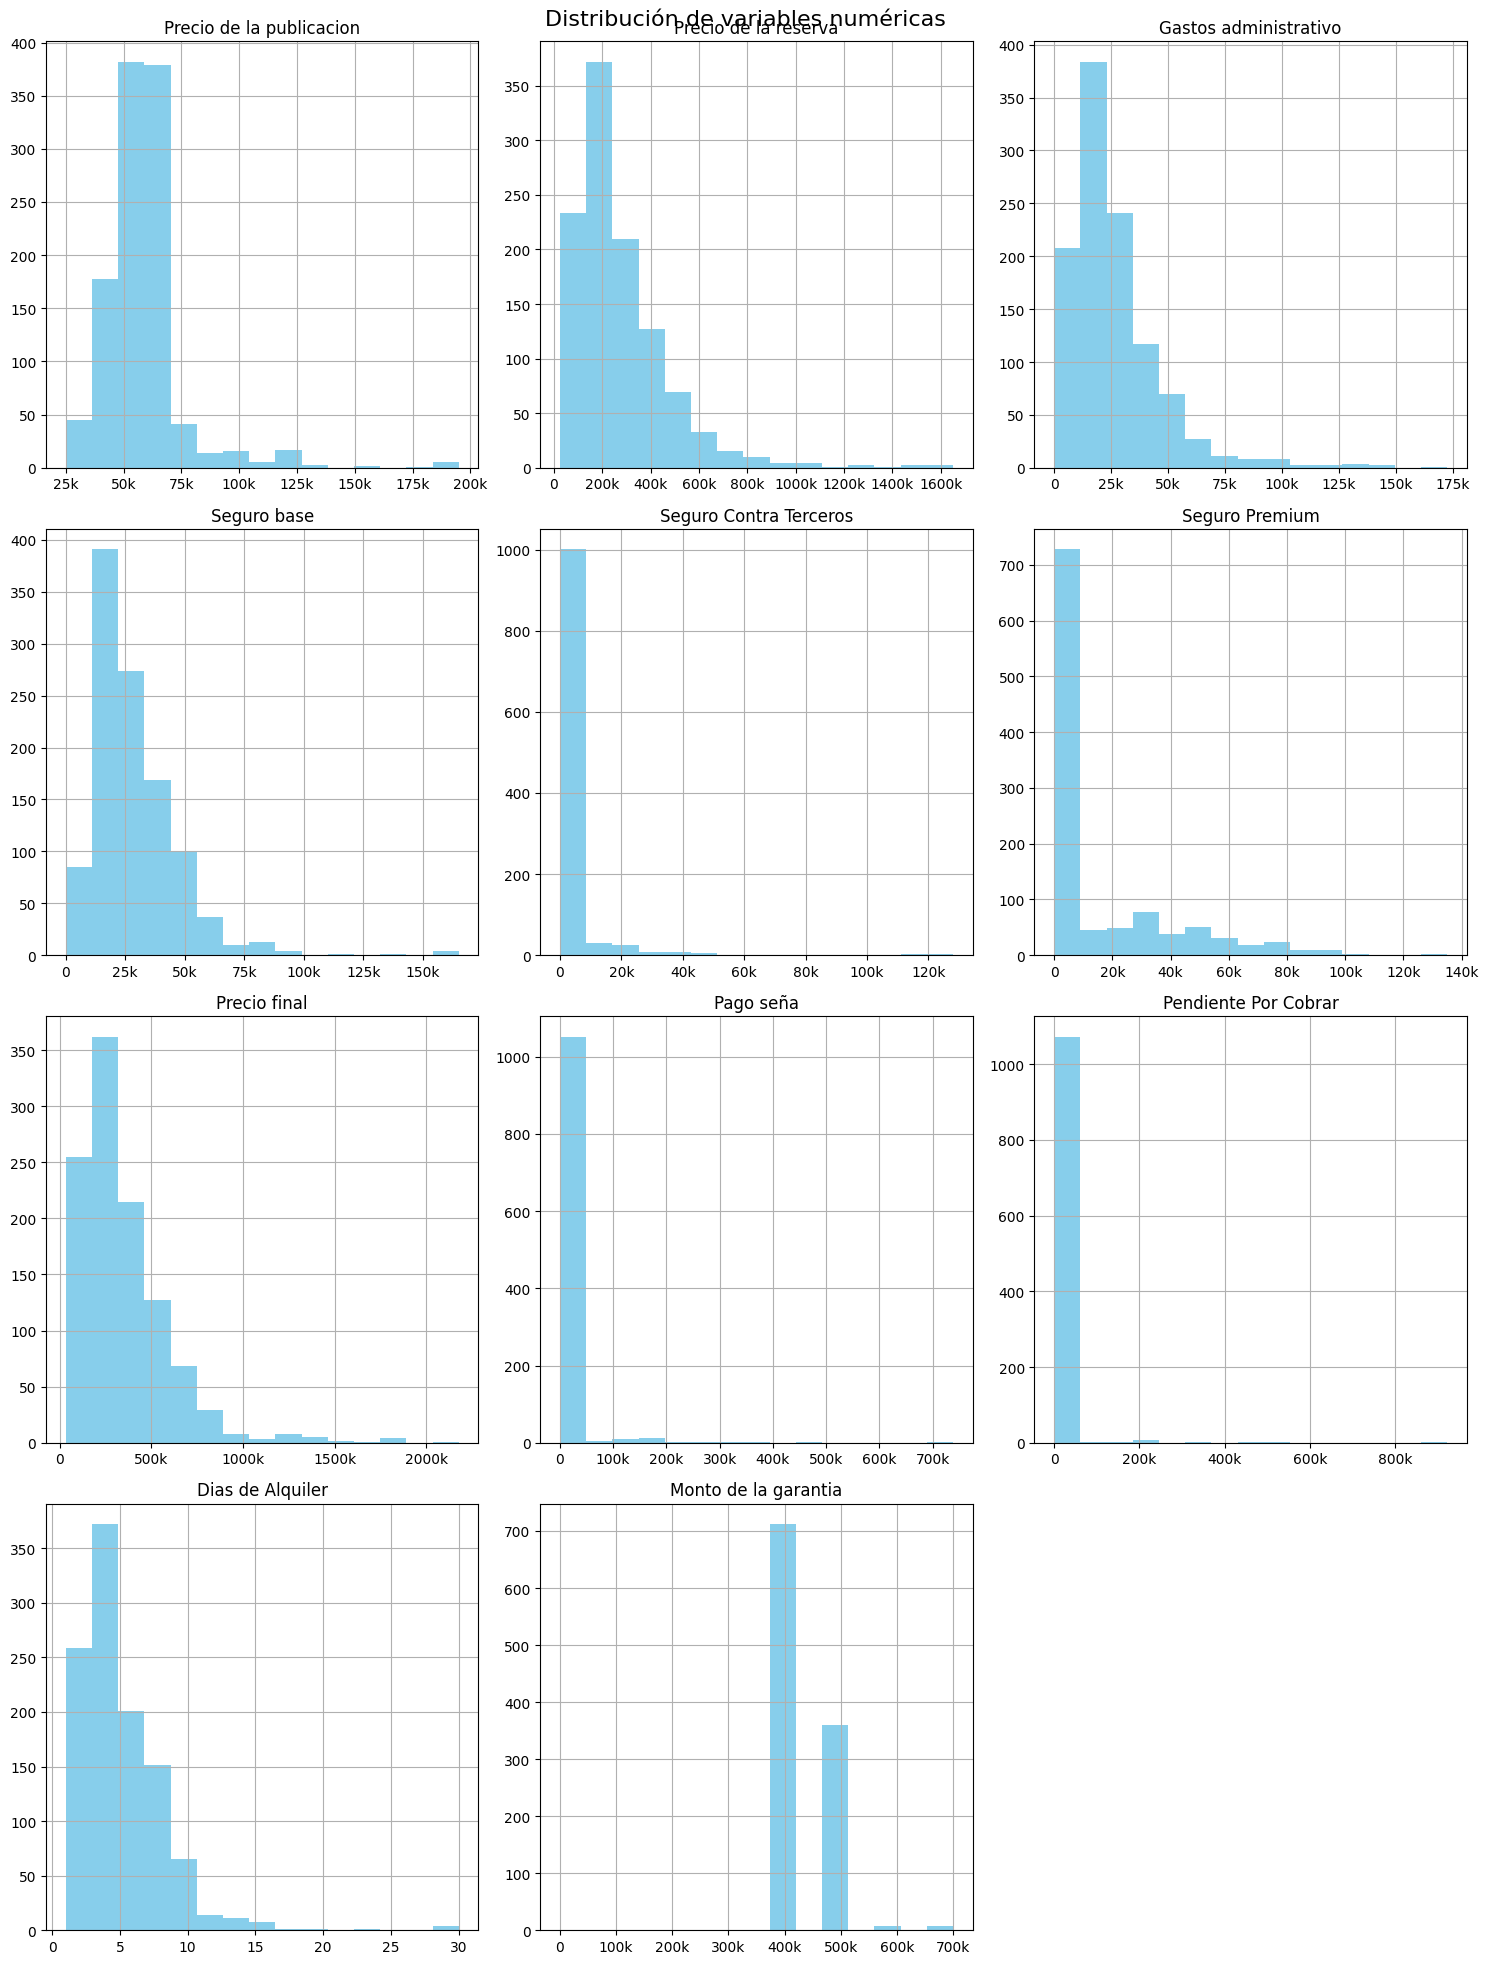

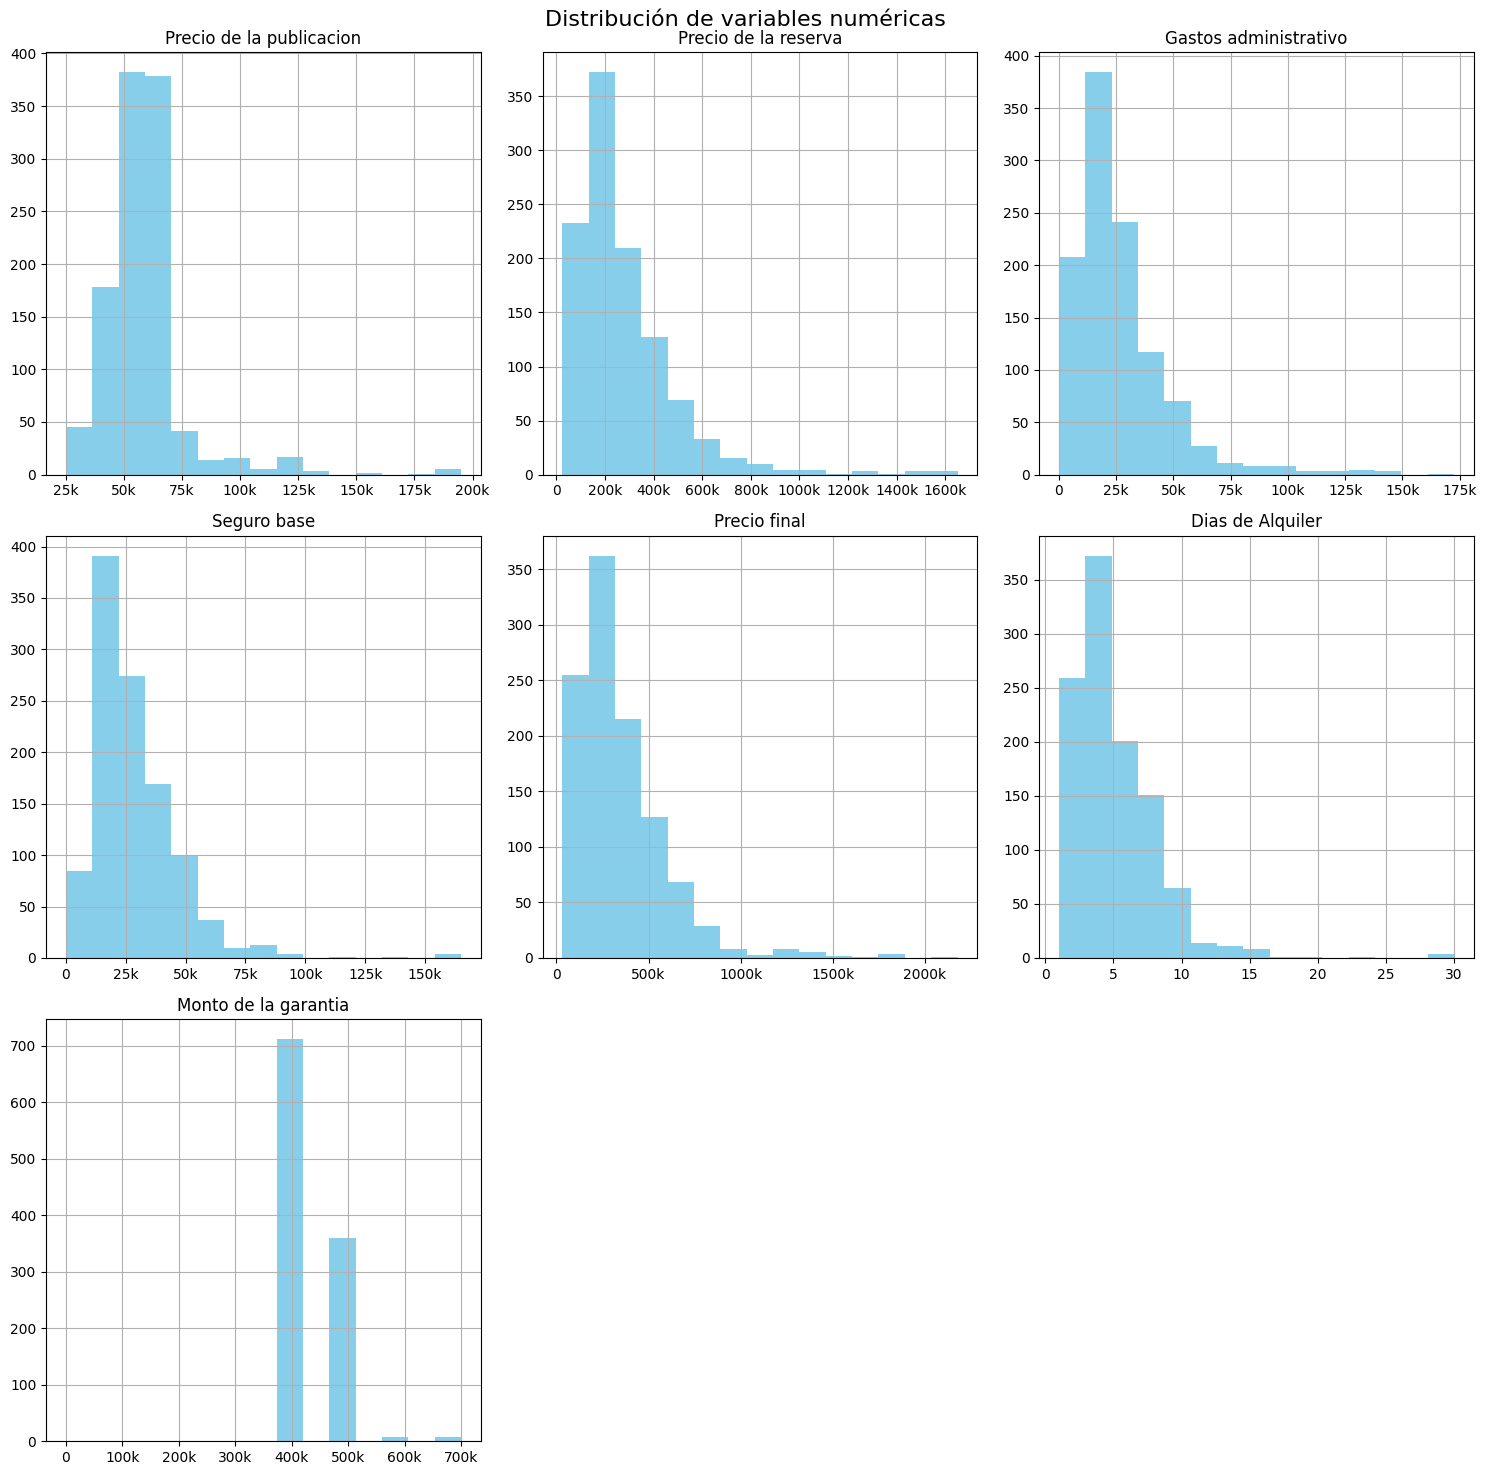

In [173]:
# Distribuciones de variables
df_filtered = pd.read_csv('dataset/Reservas_limpio.csv', sep=';')

def plot_histograms(df, title):
    # Seleccionar las columnas numéricas
    numeric_columns = df.select_dtypes(include='number').columns

    # Crear el gráfico de histogramas
    n = len(numeric_columns)
    cols = 3
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
    axes = axes.flatten()

    for i, column in enumerate(numeric_columns):
        df_filtered[column].hist(bins=15, ax=axes[i], color='skyblue')
        axes[i].set_title(column)
        axes[i].xaxis.set_major_formatter(
            ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k' if x >= 1000 else int(x))
        )

    # Eliminar subplots vacíos si hay menos columnas que espacios
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# --- HISTOGRAMAS DE VARIABLES NUMÉRICAS ANTES DE ELIMINAR COLUMNAS ---
plot_histograms(df_filtered, 'Distribución de variables numéricas')

# --- ELIMINAR LAS COLUMNAS NO RELEVANTES ---
df_filtered = df_filtered.drop(columns=['Pendiente Por Cobrar', 'Seguro Premium', 'Seguro Contra Terceros', 'Pago seña'])

# --- HISTOGRAMAS DE VARIABLES NUMÉRICAS DESPUÉS DE ELIMINAR COLUMNAS ---
plot_histograms(df_filtered, 'Distribución de variables numéricas')

df_filtered.to_csv('dataset/Reservas_limpio.csv', sep=';', index=False)

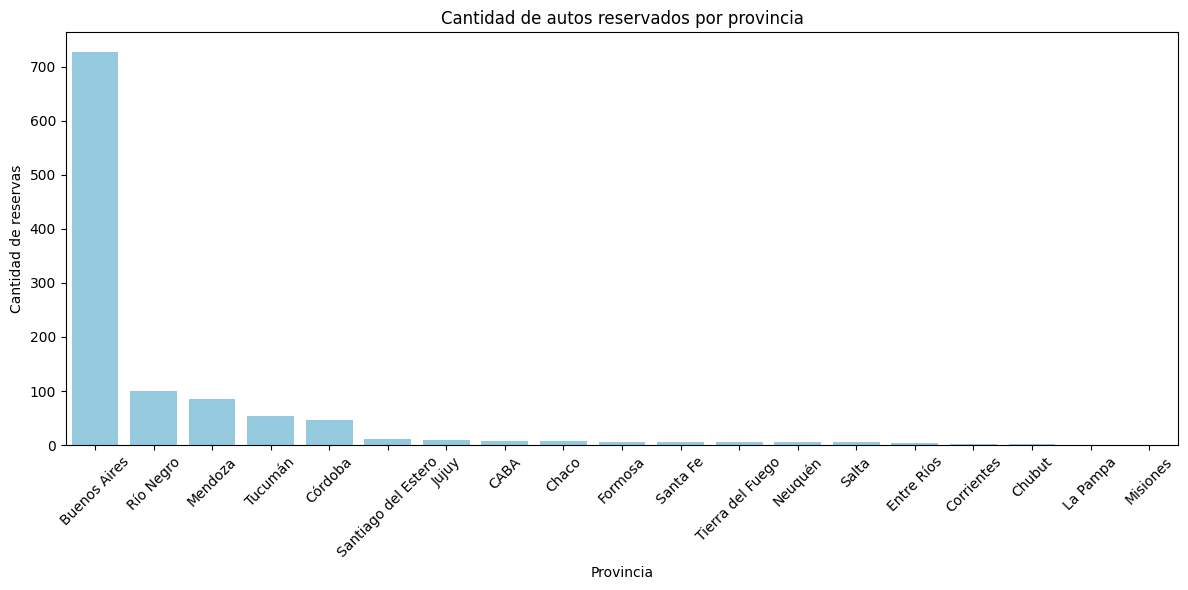

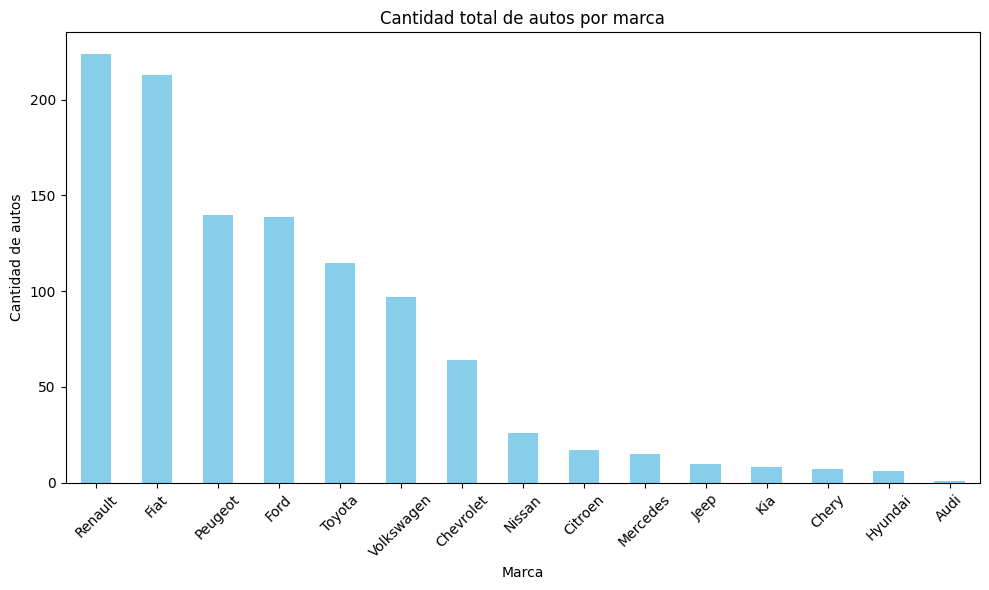

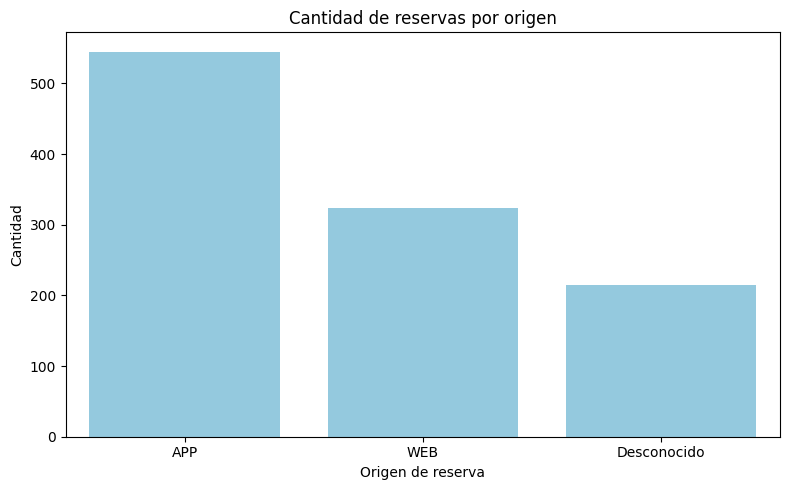

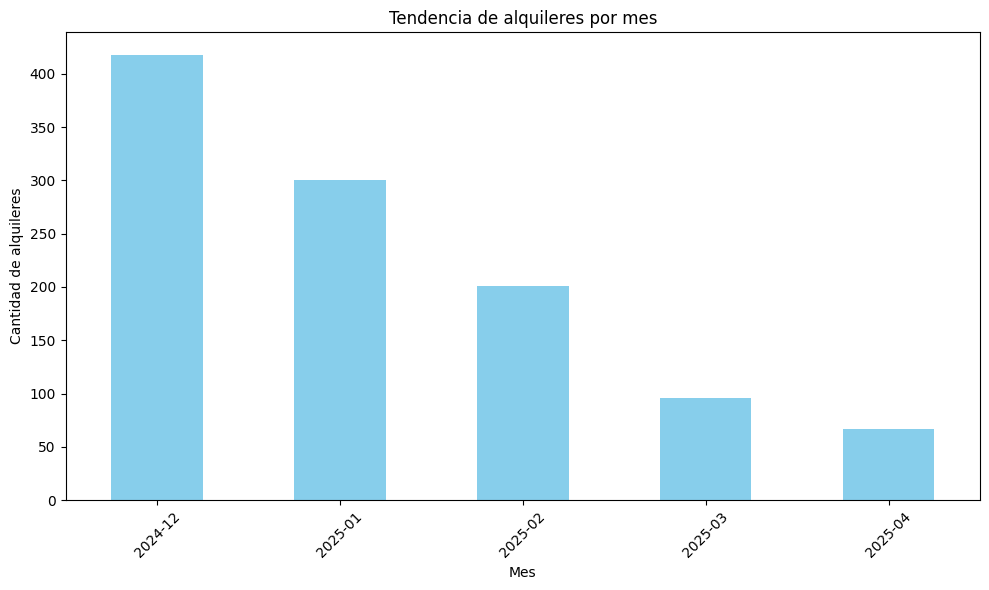

In [ ]:
# --- GRAFICO DE RESERVAS POR PROVINCIA ---
df_filtered = df_filtered[~df_filtered['Provincia'].isna()]

conteo_provincias = df_filtered['Provincia'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=conteo_provincias.index, y=conteo_provincias.values, color='skyblue')
plt.xticks(rotation=45)
plt.title("Cantidad de autos reservados por provincia")
plt.xlabel("Provincia")
plt.ylabel("Cantidad de reservas")
plt.tight_layout()
plt.show()

# --- GRAFICO DE RESERVAS POR MARCAS ---
conteo_marcas = df_filtered['Marca'].value_counts()
conteo_marcas.plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Cantidad total de autos por marca')
plt.xlabel('Marca')
plt.ylabel('Cantidad de autos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# --- GRAFICO DE RESERVAS POR ORIGEN ---
df_filtered['Origen'] = df_filtered['Origen'].fillna('Desconocido')
df_filtered['Origen'] = df_filtered['Origen'].replace('', 'Desconocido')
conteo_origen = df_filtered['Origen'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=conteo_origen.index, y=conteo_origen.values, color='skyblue')
plt.title('Cantidad de reservas por origen')
plt.xlabel('Origen de reserva')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()


# --- GRAFICO DE RESERVAS POR FECHA DE RESERVA ---
df_filtered['Fecha de creacion'] = pd.to_datetime(df_filtered['Fecha de creacion'])
df_filtered['Año-Mes'] = df_filtered['Fecha de creacion'].dt.to_period('M')
alquileres_por_mes = df_filtered['Año-Mes'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
alquileres_por_mes.plot(kind='bar', color='skyblue')
plt.title('Tendencia de alquileres por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de alquileres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 🧊 Detección de outliers con boxplots

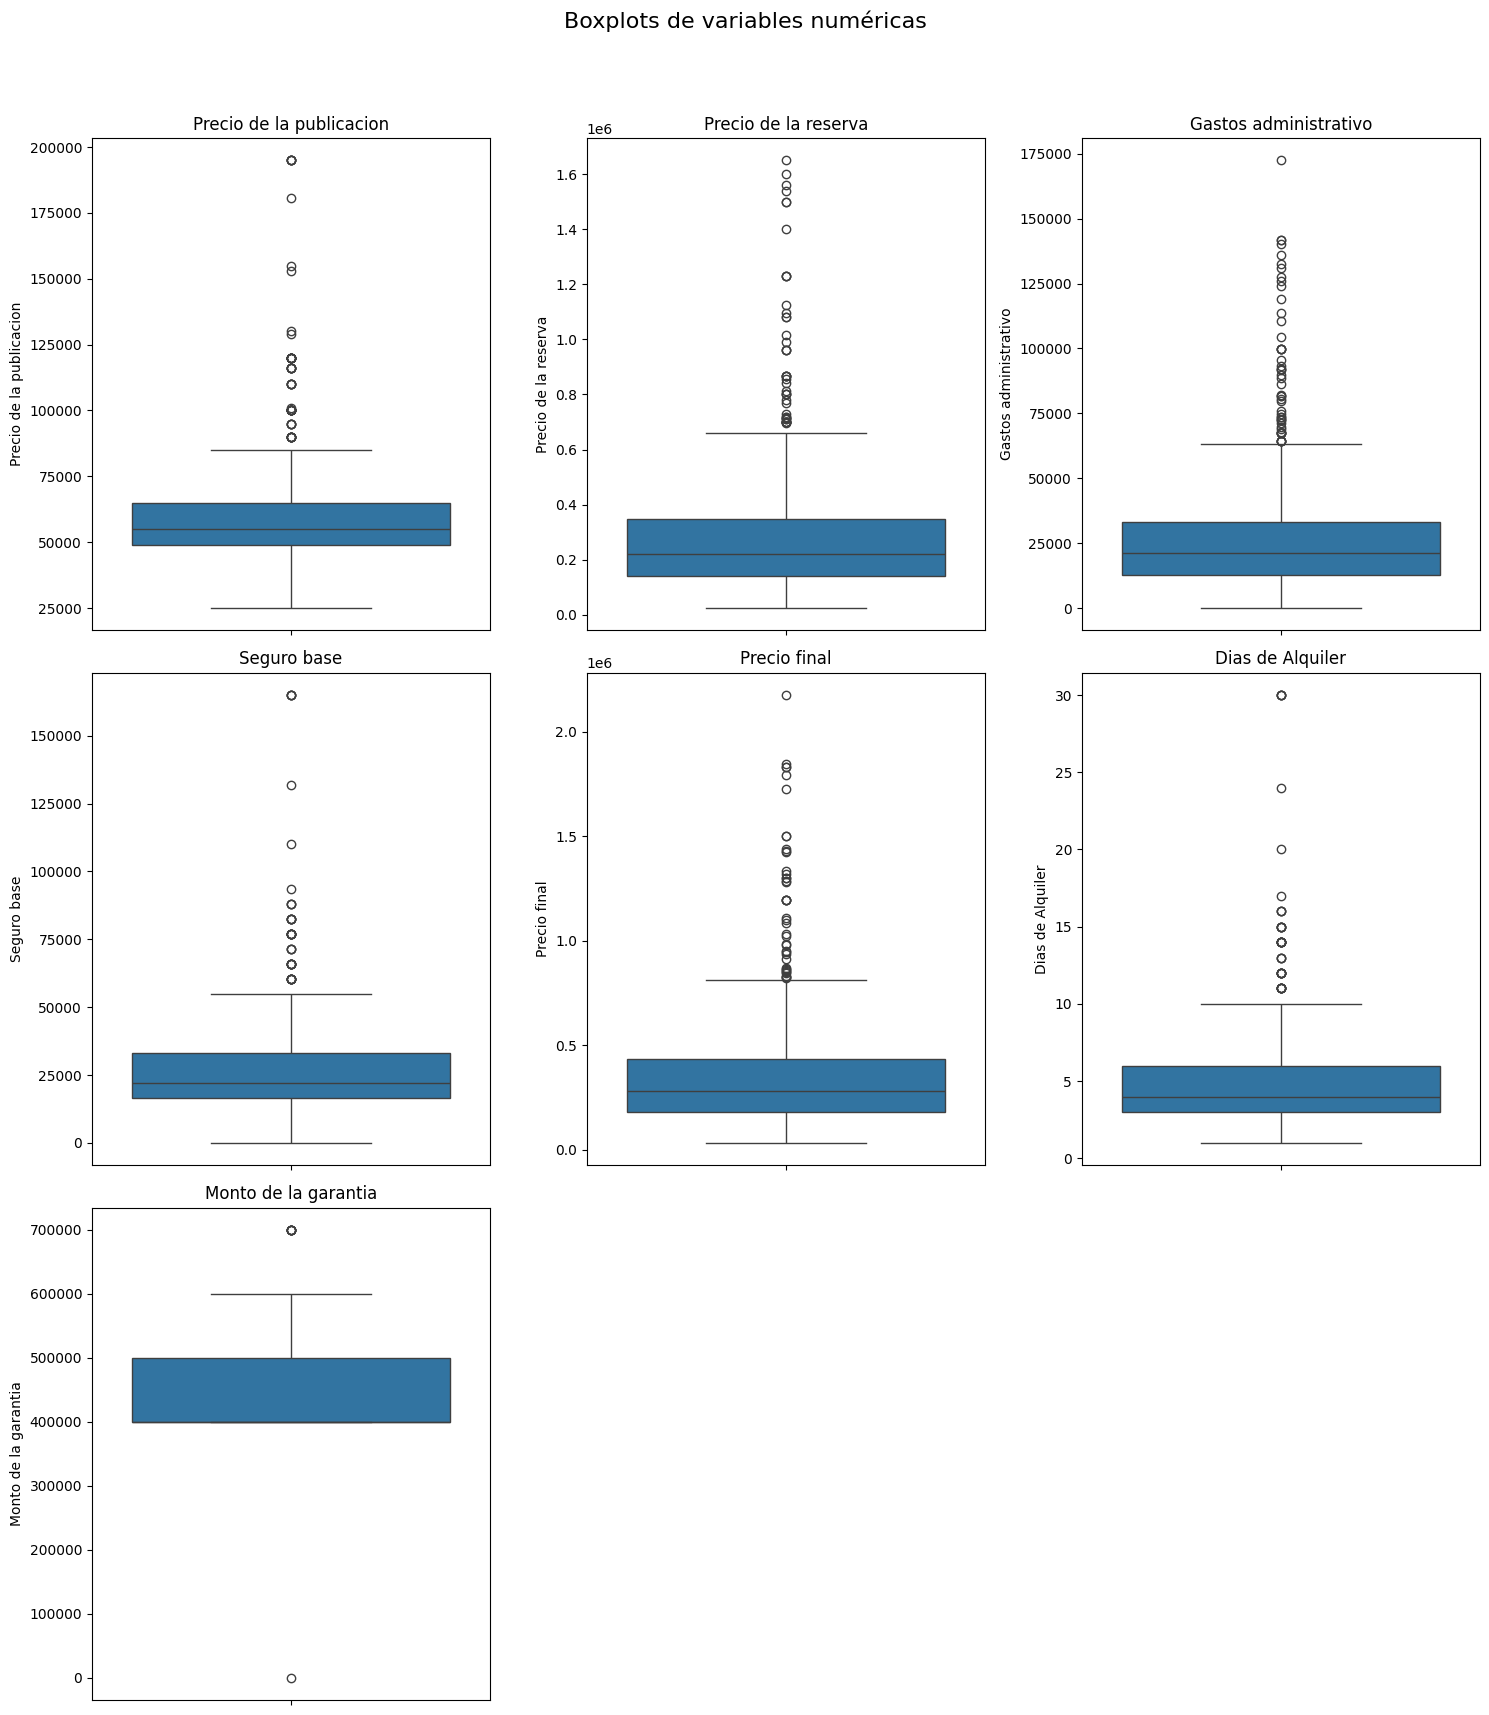

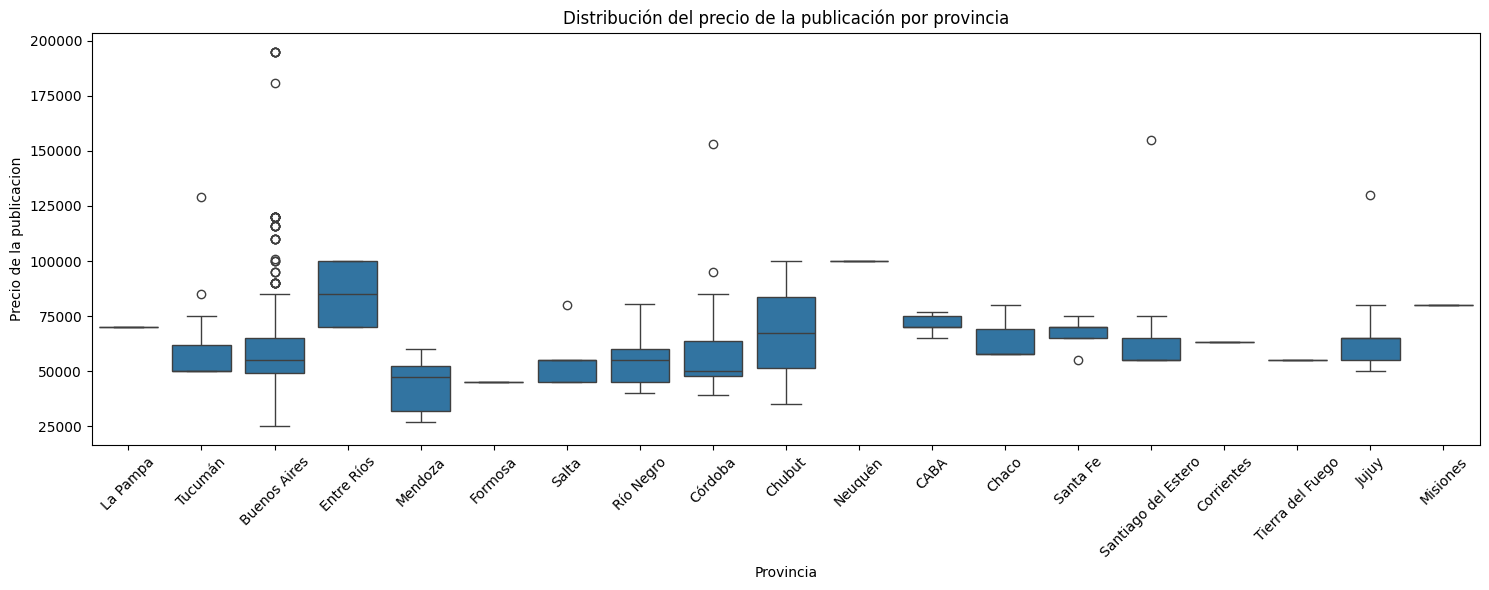

In [ ]:
# Boxplots verticales de las 12 variables numéricas (3 por fila)
columnas = df_filtered.select_dtypes(include='number').columns

# Verificar cuántas columnas hay despues de eliminar las anteriores
n_columnas = len(columnas)
cols = 3
rows = (n_columnas // cols) + (n_columnas % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 18))
axes = axes.flatten()

# Graficar cada columna de manera individual
for i, col in enumerate(columnas):
    if i < len(axes):
        sns.boxplot(y=df_filtered[col], ax=axes[i])
        axes[i].set_title(col)

for i in range(n_columnas, len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Boxplots de variables numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
plt.figure(figsize=(15, 6))
sns.boxplot(x='Provincia', y='Precio de la publicacion', data=df_filtered)
plt.xticks(rotation=45)
plt.title('Distribución del precio de la publicación por provincia')
plt.tight_layout()
plt.show()

#### 🔗 Matriz de correlación entre variables numéricas

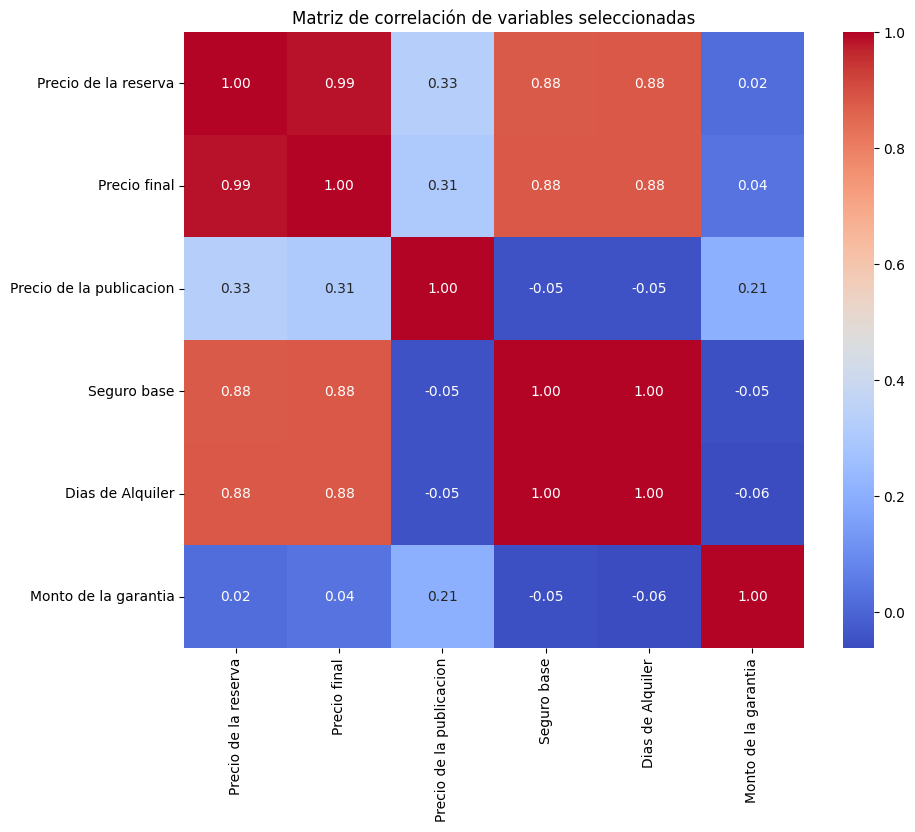

In [140]:
numericas = df_filtered.select_dtypes(include='number')
variancia = numericas.var()
columnas_validas = variancia[variancia > 0].index

columnas_correlacion = [
    'Precio de la reserva',
    'Precio final',
    'Precio de la publicacion',
    'Seguro base',
    'Seguro Contra Tercero',
    'Dias de Alquiler',
    'Monto de la garantia'
]

columnas_correlacion = [col for col in columnas_correlacion if col in numericas.columns]

plt.figure(figsize=(10, 8))
sns.heatmap(numericas[columnas_correlacion].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación de variables seleccionadas")
plt.show()

#### 📊 Relación entre variables:

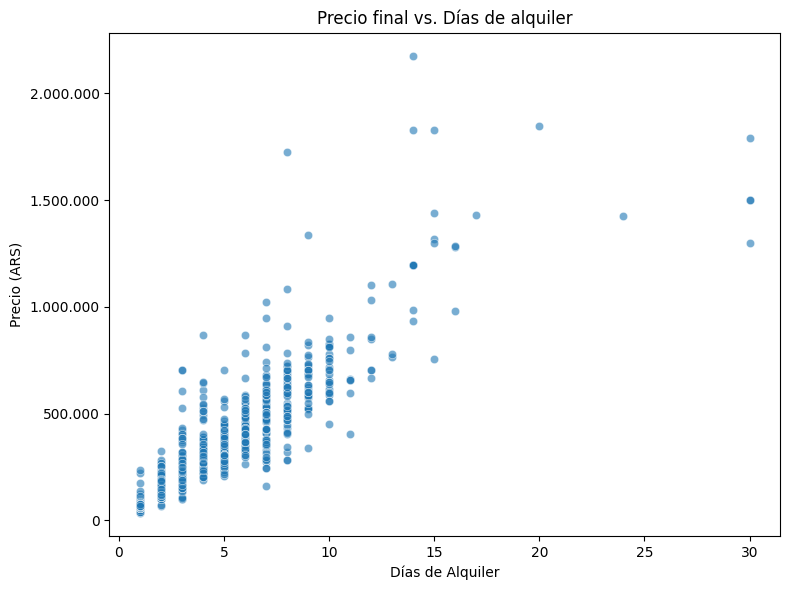

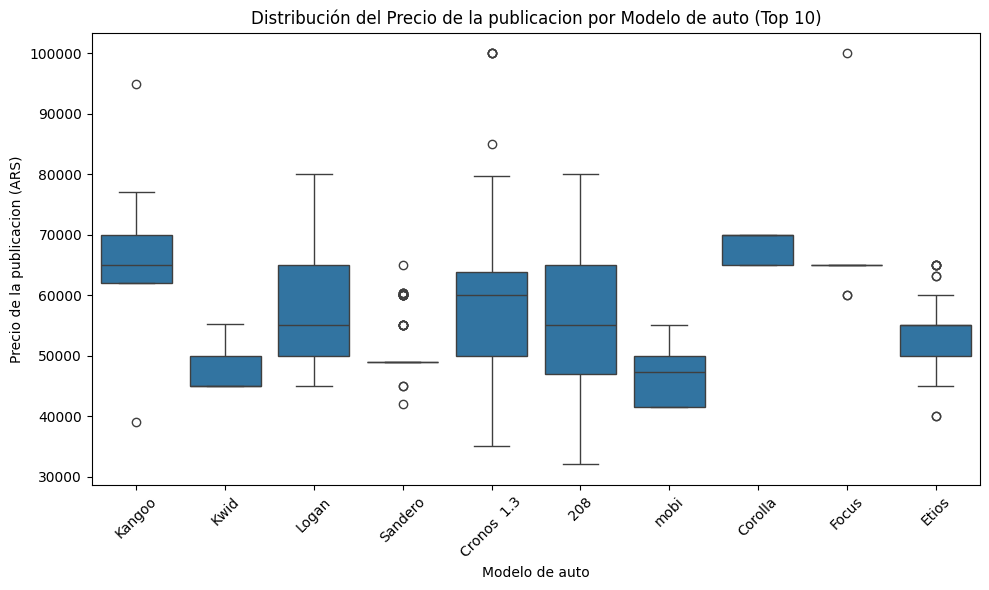

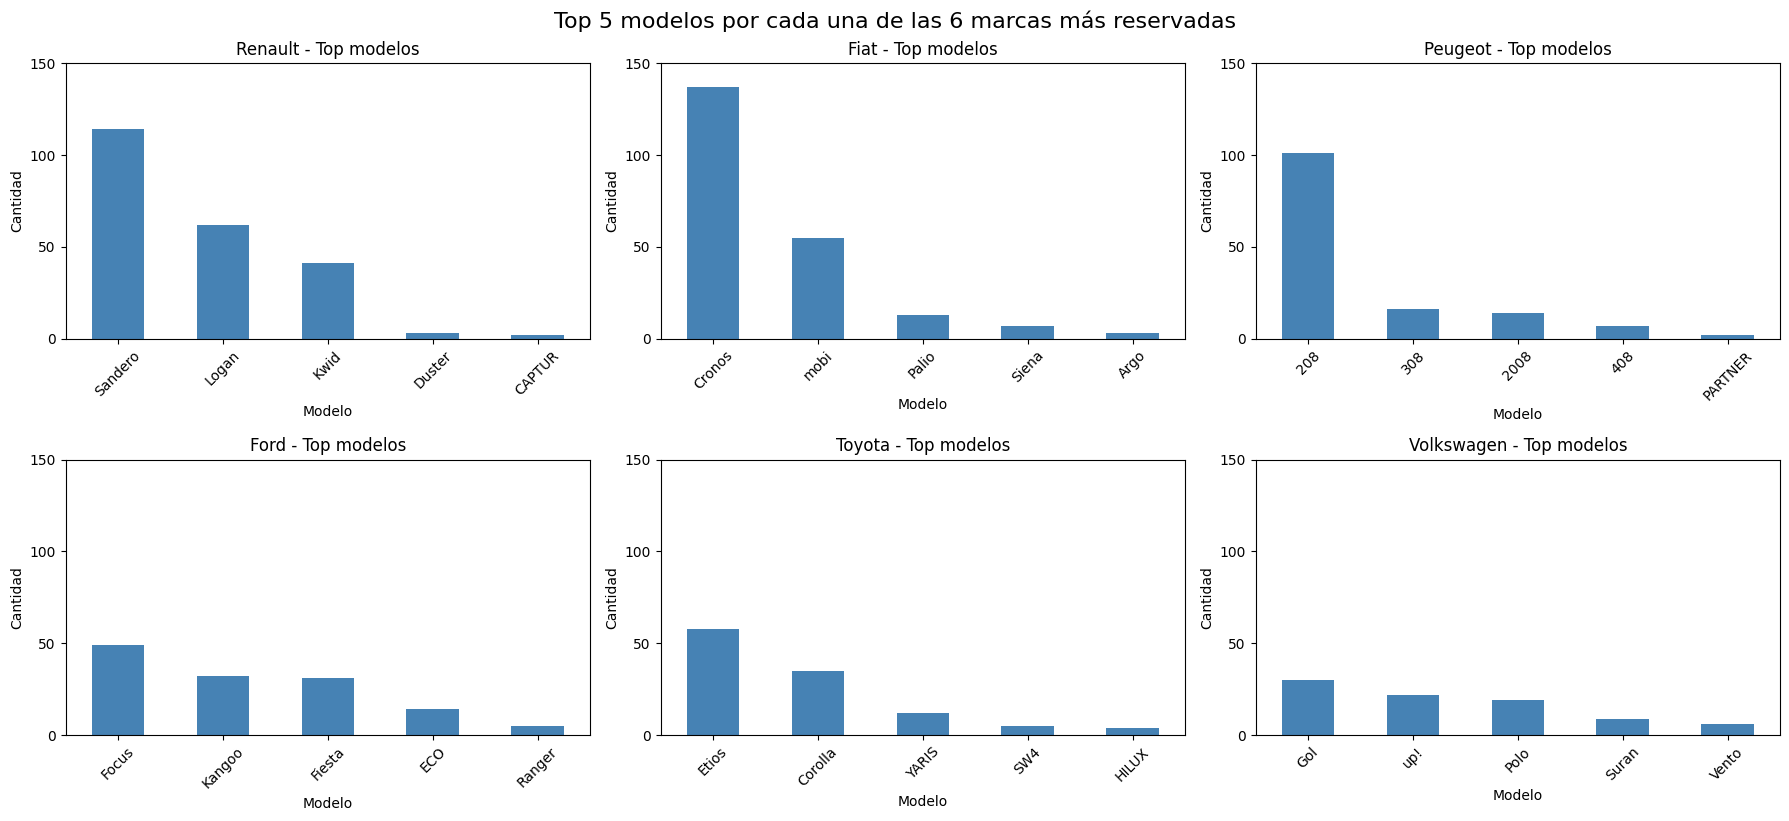

In [174]:
#sns.boxplot(x='quality', y='alcohol', data=df)
#plt.title('Distribución del alcohol según calidad del vino')
#plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_filtered,
    x='Dias de Alquiler',
    y='Precio final',
    alpha=0.6
)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))
plt.title('Precio final vs. Días de alquiler')
plt.xlabel('Días de Alquiler')
plt.ylabel('Precio (ARS)')
plt.tight_layout()
plt.show()



top_modelos = df_filtered['Modelo'].value_counts().nlargest(10).index
df_modelos = df_filtered[df_filtered['Modelo'].isin(top_modelos)]

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_modelos,
    x='Modelo',
    y='Precio de la publicacion'
)
plt.xticks(rotation=45)
plt.title('Distribución del Precio de la publicacion por Modelo de auto (Top 10)')
plt.ylabel('Precio de la publicacion (ARS)')
plt.xlabel('Modelo de auto')
plt.tight_layout()
plt.show()

# --- GRAFICO DE RESERVAS POR MODELOS Y MARCAS---
top_marcas = df_filtered['Marca'].value_counts().head(6).index
df_top = df_filtered[df_filtered['Marca'].isin(top_marcas)].copy()
df_top['Modelo_simple'] = df_top['Modelo'].astype(str).str.split().str[0]

# Calcular el límite máximo para el eje Y para que sea equitativo
max_y = df_top['Modelo_simple'].value_counts().max()
y_lim = ((max_y // 50) + 1) * 50

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
axes = axes.flatten()

for i, marca in enumerate(top_marcas):
    ax = axes[i]
    modelos = df_top[df_top['Marca'] == marca]['Modelo_simple'].value_counts().head(5)
    modelos.plot(kind='bar', ax=ax, color='steelblue')
    ax.set_title(f'{marca} - Top modelos')
    ax.set_xlabel('Modelo')
    ax.set_ylabel('Cantidad')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(0, y_lim)
    ax.set_yticks(range(0, y_lim + 1, 50))

plt.tight_layout()
plt.suptitle('Top 5 modelos por cada una de las 6 marcas más reservadas', fontsize=16, y=1.02)
plt.show()

### 🧼 4. Diagnóstico de calidad de datos
- No se detectaron valores faltantes.
- Algunas variables muestran asimetrías (ej: `residual sugar`, `chlorides`).
- Existen valores atípicos en varias variables.
- Se observa una posible relación positiva entre alcohol y calidad.

### 🧪 5. Transformaciones realizadas

In [ ]:
# Crear la categoría de rango de precios por día
def clasificar_precio_dia(precio):
    if pd.isna(precio):
        return 'Desconocido'
    elif precio < 35000:
        return 'Bajo'
    elif precio <= 55000:
        return 'Medio'
    else:
        return 'Alto'

df_filtered['Rango de precio'] = df_filtered['Precio de la publicacion'].apply(clasificar_precio_dia)
df_filtered['Rango de precio'] = pd.Categorical(
    df_filtered['Rango de precio'],
    categories=['Bajo', 'Medio', 'Alto', 'Desconocido'],
    ordered=True
)

# Crear la categoría de antiguedad de reserva 
checkin_parsed = pd.to_datetime(df_filtered['Check-in'], errors='coerce', dayfirst=True)
creacion_parsed = pd.to_datetime(df_filtered['Fecha de creacion'], errors='coerce')

df_filtered['Antiguedad dias'] = (checkin_parsed - creacion_parsed).dt.days
def clasificar_antiguedad(dias):
    if pd.isna(dias):
        return 'Desconocido'
    if dias <= 7:
        return 'Último momento'
    elif dias <= 14:
        return 'Moderada'
    else:
        return 'Anticipada'

df_filtered['Antigüedad de Reserva'] = df_filtered['Antiguedad dias'].apply(clasificar_antiguedad)

# Verificar reservas hay por categoría
conteo = df_filtered['Antigüedad de Reserva'].value_counts().reset_index()
conteo.columns = ['Tipo de Antigüedad', 'Cantidad']
print(conteo)

#Verificar rango de precios
conteo = df_filtered['Rango de precio'].value_counts().reset_index()
conteo.columns = ['Tipo de rango de precio', 'Cantidad']
print(conteo)


df_filtered.to_csv('dataset/Reservas_transofrmado.csv', sep=';', index=False)


  Tipo de Antigüedad  Cantidad
0     Último momento       644
1         Anticipada       320
2           Moderada       124
  Tipo de rango de precio  Cantidad
0                   Medio       556
1                    Alto       494
2                    Bajo        38
3             Desconocido         0


C:\Users\desir\AppData\Local\Temp\ipykernel_20580\1091008176.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  checkin_parsed = pd.to_datetime(df_filtered['Check-in'], errors='coerce', dayfirst=True)


In [ ]:
# Normalización de variables numéricas (excepto quality)


In [181]:
df_filtered.head()

,Fecha de creacion,Estado,Ubicacion,Origen,Modelo,Precio de la publicacion,Precio de la reserva,Gastos administrativo,Seguro base,Precio final,...,Dias de Alquiler,Pago de garantia,Monto de la garantia,Devolución Garantia,Provincia,Marca,Rango de precio,Rango de precioa,Antiguedad dias,Antigüedad de Reserva
0,2024-12-01 11:55:20.519032,CANCELADA,"Gobernador Duval, Santa Rosa, La Pampa Provinc...",WEB,Ranger,70000,2.605836,23800,22000,349400,...,4,NO,400000,NO,La Pampa,Ford,Alto,Alto,28,Anticipada
1,2024-12-01 12:41:15.321837,CANCELADA,"Celedonio Gutiérrez 1287, San Miguel de Tucumá...",WEB,Kangoo,62000,2.613324,26350,27500,363850,...,5,NO,400000,NO,Tucumán,Ford,Alto,Alto,39,Anticipada
2,2024-12-01 16:37:53.300474,CANCELADA,"Av. Lope de Vega 2247, Buenos Aires, Argentina",WEB,Spin,75000,2.660587,51000,44000,695000,...,8,NO,400000,NO,Buenos Aires,Chevrolet,Alto,Alto,33,Anticipada
3,2024-12-02 12:43:49.469179,CANCELADA,"Costa Rica 3966, Buenos Aires, Argentina",NaN,Kwid,50000,2.469776,4250,5500,65650,...,1,SI,400000,NO,Buenos Aires,Renault,Medio,Medio,2,Último momento
4,2024-12-02 13:10:59.301507,COMPLETADA,"Bolívar 355, Buenos Aires, Argentina",NaN,Logan,60000,2.610918,25500,27500,382500,...,5,SI,400000,NO,Buenos Aires,Renault,Alto,Alto,19,Anticipada


### ✍️ 6. Reflexión final

Completar
